<a href="https://colab.research.google.com/github/judajuded2012/DECISION-TREE/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [85]:
data = pd.read_csv('/content/drive/MyDrive/Data set/talking_data.csv')

In [86]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [87]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])



Dimension of dataset: (100000, 8)
Number of rows in the dataset: 100000
Number of columns in the dataset: 8


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [89]:
data.describe()


,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [90]:
miss_val = data.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [91]:
data.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

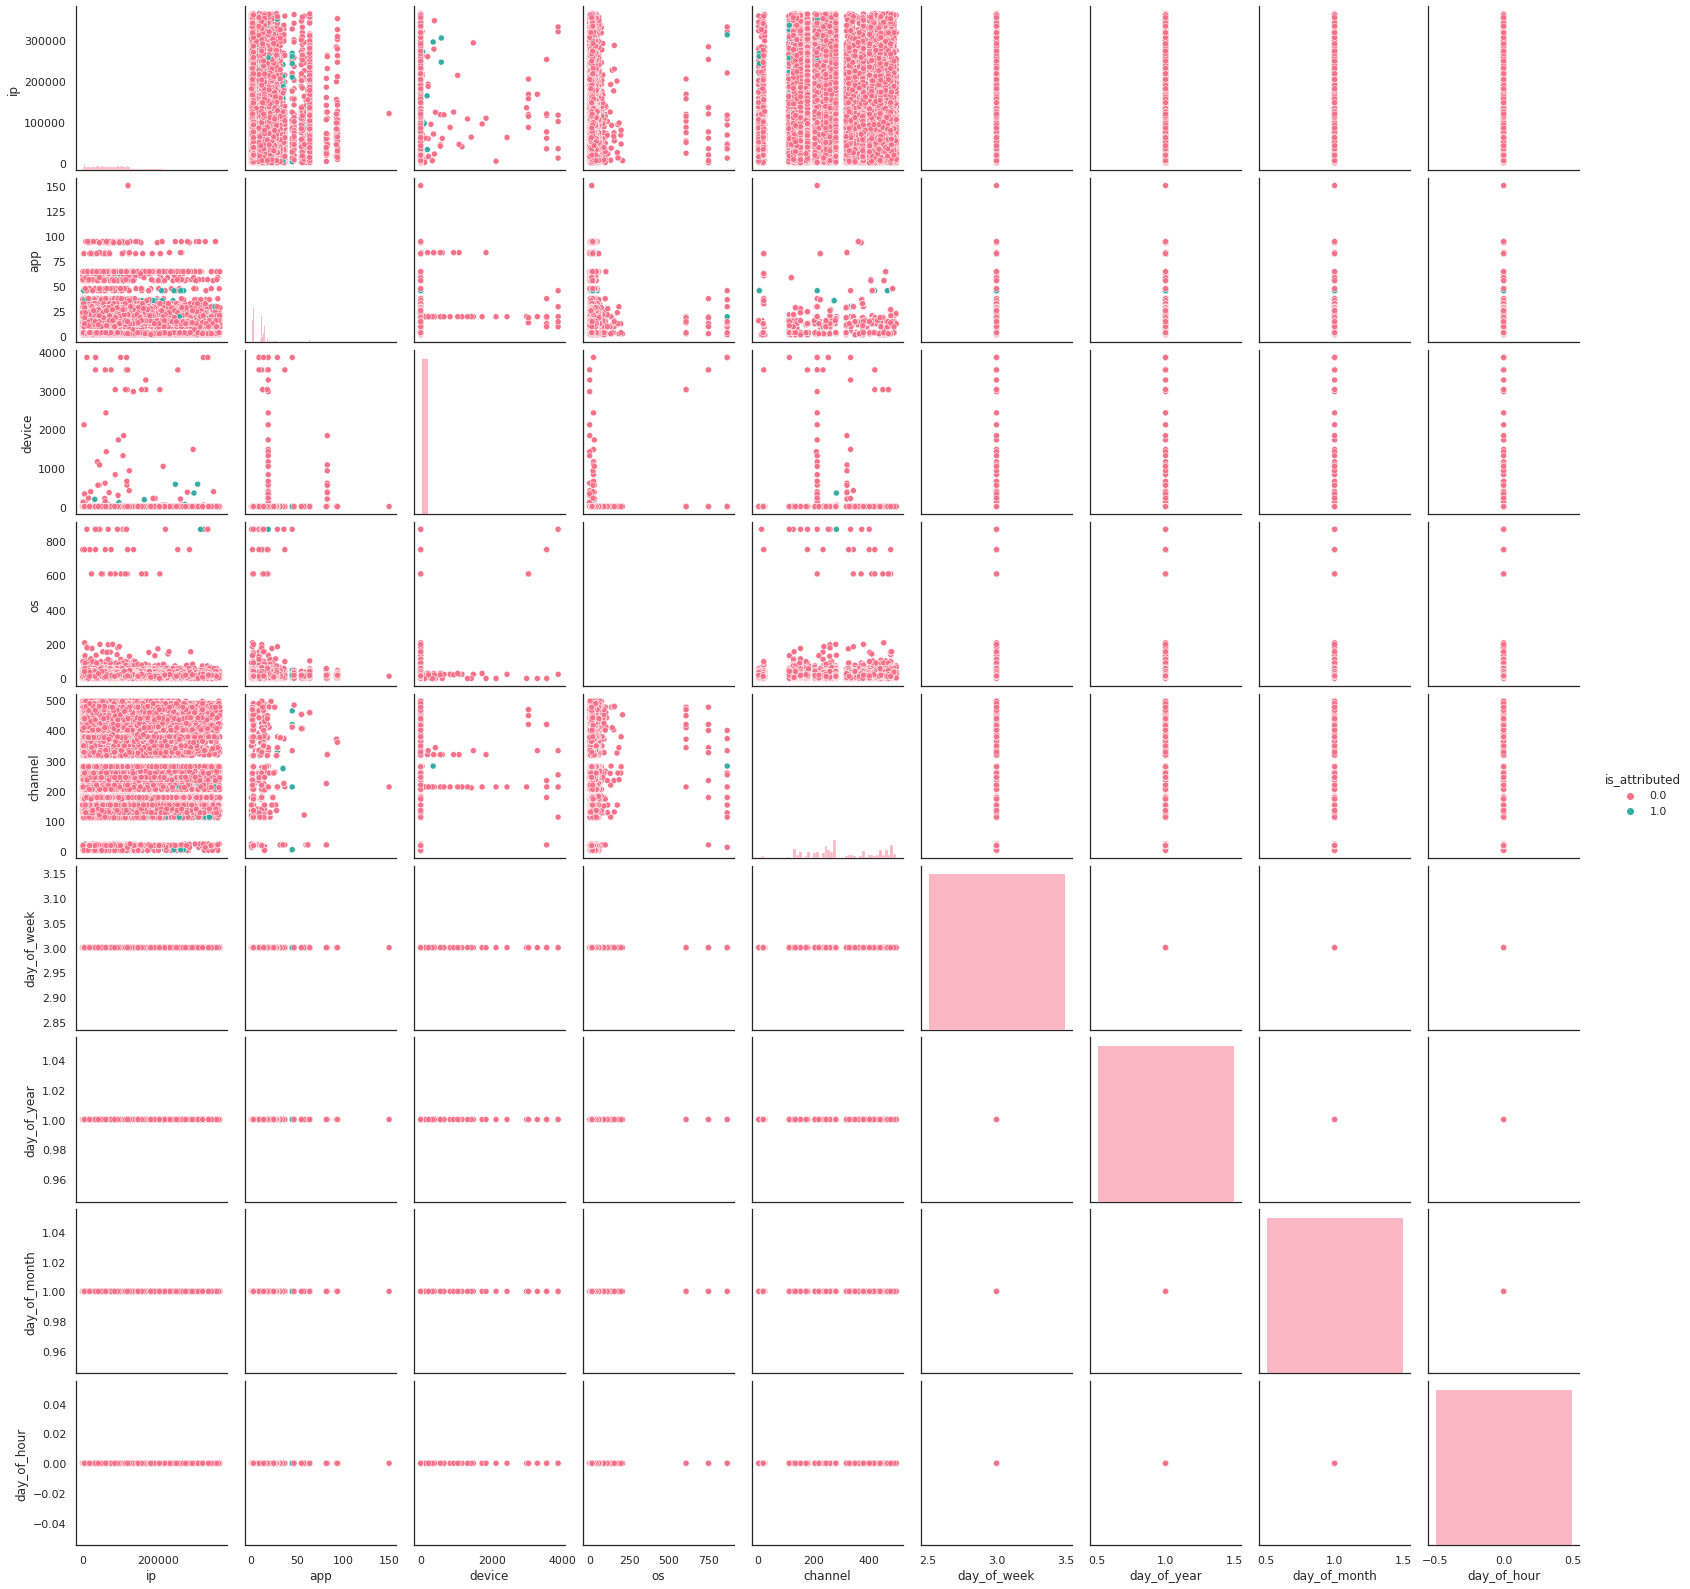

In [141]:
sns.pairplot(data, hue="is_attributed", diag_kind = 'hist', palette="husl")

In [93]:
corr = data.corr()
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


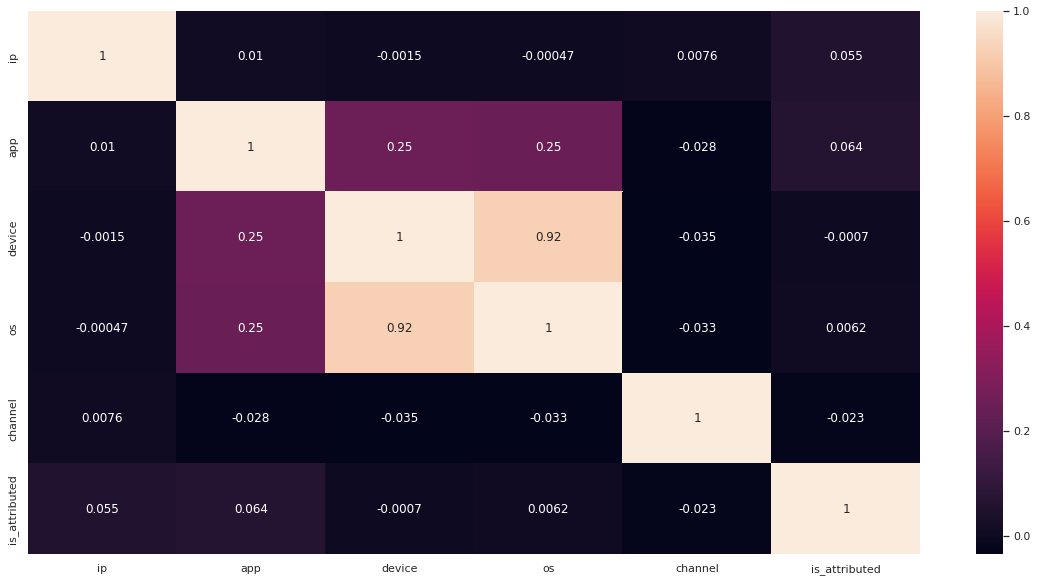

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)


# Transformation of data

In [95]:
for feature in data.columns:
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes 
        
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ip               100000 non-null  int64
 1   app              100000 non-null  int64
 2   device           100000 non-null  int64
 3   os               100000 non-null  int64
 4   channel          100000 non-null  int64
 5   click_time       100000 non-null  int32
 6   attributed_time  100000 non-null  int16
 7   is_attributed    100000 non-null  int64
dtypes: int16(1), int32(1), int64(6)
memory usage: 5.1 MB


In [96]:
data.describe()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,40447.860560,-0.741220,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,23170.259565,6.259531,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000,-1.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,20274.750000,-1.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,40555.500000,-1.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,60688.250000,-1.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,80349.000000,226.000000,1.000000


In [97]:
x = data.app.value_counts()

In [98]:
x

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
145        1
97         1
96         1
267        1
261        1
Name: app, Length: 161, dtype: int64

In [99]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'], dtype='object')

In [100]:
df = data.copy()

In [101]:
rmv = x[x<=(20)].index
df.replace(rmv, np.nan, inplace= True)

In [102]:
df.drop('attributed_time',inplace=True,axis=1)

In [103]:
df = df.dropna()

In [104]:
data = df.copy()

In [105]:
data['day_of_week']= pd.to_datetime(data.click_time).dt.day_of_week

In [106]:
data['day_of_week']

0        3
1        3
2        3
3        3
4        3
        ..
99994    3
99996    3
99997    3
99998    3
99999    3
Name: day_of_week, Length: 72804, dtype: int64

In [107]:
data['day_of_year']= pd.to_datetime(data.click_time).dt.day_of_year
data['day_of_year']


0        1
1        1
2        1
3        1
4        1
        ..
99994    1
99996    1
99997    1
99998    1
99999    1
Name: day_of_year, Length: 72804, dtype: int64

In [108]:
data['day_of_month']= pd.to_datetime(data.click_time).dt.month
data['day_of_month']

0        1
1        1
2        1
3        1
4        1
        ..
99994    1
99996    1
99997    1
99998    1
99999    1
Name: day_of_month, Length: 72804, dtype: int64

In [109]:
data['day_of_hour']= pd.to_datetime(data.click_time).dt.hour
data['day_of_hour']

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: day_of_hour, Length: 72804, dtype: int64

In [110]:
data.drop('click_time', axis=1, inplace=True)

In [111]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day_of_week',
       'day_of_year', 'day_of_month', 'day_of_hour'],
      dtype='object')

In [112]:
data.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
is_attributed    0
day_of_week      0
day_of_year      0
day_of_month     0
day_of_hour      0
dtype: int64

# Splitting of Data into Training and Test Dataset

In [113]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [114]:
x = data.drop(['is_attributed'],axis=1)
y=data['is_attributed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

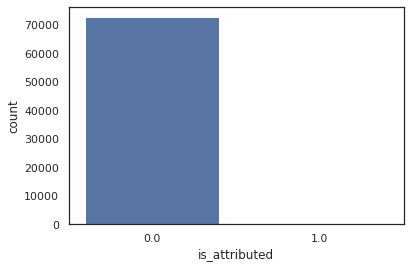

In [115]:
import seaborn as sns
sns.countplot(y)

In [116]:
print('Befor Oversampling count of label 1 ',sum(y_train==1))
print('Befor Oversampling count of label 0 ',sum(y_train==0))


Befor Oversampling count of label 1  115
Befor Oversampling count of label 0  58128


In [117]:
x.isnull().sum()

ip              0
app             0
device          0
os              0
channel         0
day_of_week     0
day_of_year     0
day_of_month    0
day_of_hour     0
dtype: int64

In [118]:
sum(y_test==1)

30

#Accuracy

In [119]:
from sklearn import datasets
from xgboost import XGBClassifier as xgb
xgb=xgb()
xgb.fit(x_train,y_train)

XGBClassifier()

In [120]:
pred=xgb.predict_proba( x_test)
pred1=xgb.predict( x_test)

pred[:10]

array([[9.99892771e-01, 1.07233034e-04],
       [9.99662876e-01, 3.37138859e-04],
       [9.99773324e-01, 2.26674572e-04],
       [9.99709189e-01, 2.90785334e-04],
       [9.99619603e-01, 3.80408397e-04],
       [9.99800861e-01, 1.99127491e-04],
       [9.99892771e-01, 1.07233034e-04],
       [9.99877274e-01, 1.22737998e-04],
       [9.98597622e-01, 1.40239217e-03],
       [9.99825418e-01, 1.74583780e-04]], dtype=float32)

In [121]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy= accuracy_score(y_test,pred1)
print('Accuracy is:',(accuracy*100))

Accuracy is: 99.8145731749193


In [122]:
confusion_matrix(y_test,pred1)

array([[14530,     1],
       [   26,     4]])

In [123]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14556
         1.0       0.13      0.80      0.23         5

    accuracy                           1.00     14561
   macro avg       0.57      0.90      0.61     14561
weighted avg       1.00      1.00      1.00     14561





> Indented block



In [124]:
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(x_train,y_train)
pred = XG.predict_proba(x_test)
model_score = XG.score(x_test,y_test)
print(model_score)

0.9981457317491931


In [125]:
from sklearn.metrics import roc_auc_score
ar_score = roc_auc_score(y_test,pred[:,1])

In [126]:
print(ar_score)

0.9363934576652215


In [127]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm,Y_sm=sm.fit_resample(x,y)


In [128]:
x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.20,random_state=10)
XG.fit(x_train,y_train)
XG

XGBClassifier()

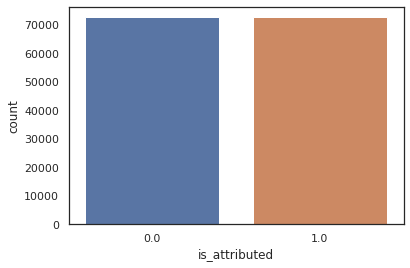

In [129]:
sns.countplot(Y_sm)

In [130]:
predictions=XG.predict(x_test)
predictions

array([0., 1., 0., ..., 0., 1., 1.])

In [131]:
accuracy=accuracy_score(y_test,predictions)

In [132]:
accuracy

0.9708918249380677

In [133]:
cm=confusion_matrix(predictions,y_test)
cm

array([[14133,   510],
       [  336, 14085]])

In [134]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


In [135]:
dt = DecisionTreeClassifier()
rfe = RFE(dt,n_features_to_select= 5)
rfe.fit(x_test,y_test)
rfe_features = rfe.support_

In [136]:
for feature in rfe_features.nonzero():
  top_5 = x_test.columns[feature]
  print(top_5)

Index(['ip', 'app', 'device', 'os', 'channel'], dtype='object')


In [137]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9974883016790531
The confusion matrix of Bagging classifier model is
[[14442    27]
 [   46 14549]]


In [138]:
predictions=bgcl.predict(x_test)
predictions

array([0., 1., 0., ..., 0., 1., 1.])

In [139]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9973506743737958
The confusion matrix of Bagging classifier model is
[[14440    29]
 [   48 14547]]


In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,predictions)
print(auc_score)

0.9974910886136622
